In [9]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.2742 - acc: 0.9153 - val_loss: 0.0589 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0902 - acc: 0.9738 - val_loss: 0.0425 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0671 - acc: 0.9802 - val_loss: 0.0373 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0560 - acc: 0.9832 - val_loss: 0.0341 - val_acc: 0.9882
Epoch 5/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0484 - acc: 0.9851 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0423 - acc: 0.9870 - val_loss: 0.0348 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0384 - acc: 0.9884 - val_loss: 0.0284 - val_acc

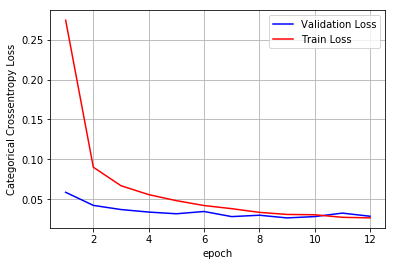

In [10]:
   
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.2461 - acc: 0.9247 - val_loss: 0.0495 - val_acc: 0.9837
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0846 - acc: 0.9751 - val_loss: 0.0337 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0651 - acc: 0.9802 - val_loss: 0.0346 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0515 - acc: 0.9842 - val_loss: 0.0308 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0438 - acc: 0.9869 - val_loss: 0.0307 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0405 - acc: 0.9872 - val_loss: 0.0279 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0341 - acc: 0.9891 - val_loss: 0.0300 - val_acc

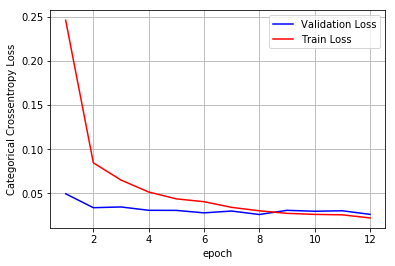

In [14]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.2312 - acc: 0.9293 - val_loss: 0.0437 - val_acc: 0.9866
Epoch 2/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0777 - acc: 0.9779 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 3/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0591 - acc: 0.9834 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0469 - acc: 0.9863 - val_loss: 0.0232 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0378 - acc: 0.9889 - val_loss: 0.0216 - val_acc: 0.9933
Epoch 6/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0250 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0311 - acc: 0.9897 - val_loss: 0.0220 - val_ac

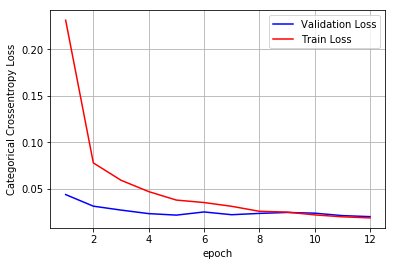

In [15]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 108us/step - loss: 0.2776 - acc: 0.9161 - val_loss: 0.0609 - val_acc: 0.9806
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0995 - acc: 0.9702 - val_loss: 0.0398 - val_acc: 0.9873
Epoch 3/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0719 - acc: 0.9787 - val_loss: 0.0369 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0572 - acc: 0.9825 - val_loss: 0.0331 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0479 - acc: 0.9851 - val_loss: 0.0279 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0270 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0286 - val_ac

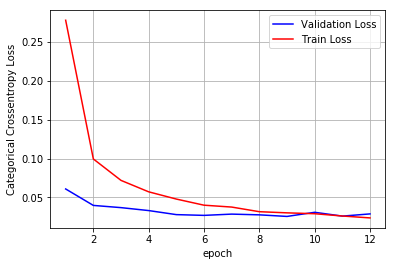

In [16]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2,2),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (2,2 ), activation='relu'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.2874 - acc: 0.9117 - val_loss: 0.0515 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0886 - acc: 0.9742 - val_loss: 0.0326 - val_acc: 0.9883
Epoch 3/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0651 - acc: 0.9809 - val_loss: 0.0261 - val_acc: 0.9911
Epoch 4/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0539 - acc: 0.9843 - val_loss: 0.0249 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0440 - acc: 0.9873 - val_loss: 0.0231 - val_acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0413 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0356 - acc: 0.9897 - val_loss: 0.0210 - val_ac

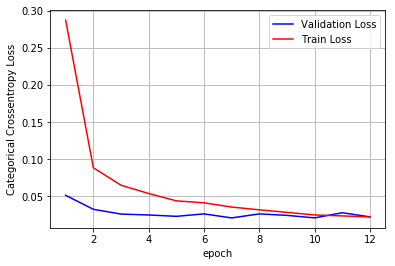

In [17]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2,2),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (2,2 ), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (2,2 ), activation='relu'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.2874 - acc: 0.9084 - val_loss: 0.0437 - val_acc: 0.9867
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0746 - acc: 0.9781 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 3/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0520 - acc: 0.9847 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 4/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0416 - acc: 0.9880 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0355 - acc: 0.9898 - val_loss: 0.0225 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0316 - acc: 0.9910 - val_loss: 0.0234 - val_acc: 0.9929
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0264 - acc: 0.9919 - val_loss: 0.0209 - val_ac

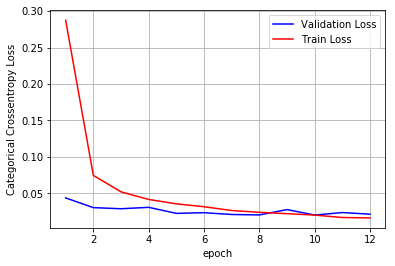

In [18]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.3961 - acc: 0.8728 - val_loss: 0.0732 - val_acc: 0.9774
Epoch 2/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.1023 - acc: 0.9708 - val_loss: 0.0511 - val_acc: 0.9844
Epoch 3/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0734 - acc: 0.9789 - val_loss: 0.0396 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0586 - acc: 0.9826 - val_loss: 0.0384 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0482 - acc: 0.9860 - val_loss: 0.0368 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0405 - acc: 0.9889 - val_loss: 0.0318 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0367 - val_ac

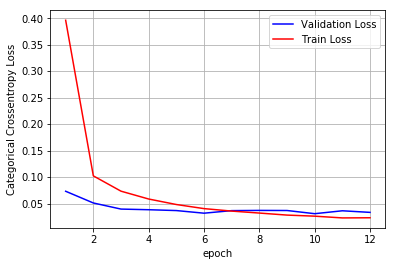

In [19]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.4485 - acc: 0.8569 - val_loss: 0.0765 - val_acc: 0.9770
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.1312 - acc: 0.9625 - val_loss: 0.0495 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0953 - acc: 0.9732 - val_loss: 0.0404 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0768 - acc: 0.9786 - val_loss: 0.0406 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0662 - acc: 0.9812 - val_loss: 0.0397 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0582 - acc: 0.9833 - val_loss: 0.0396 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0550 - acc: 0.9846 - val_loss: 0.0365 - val_ac

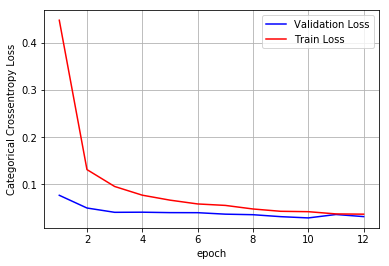

In [20]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.2304 - acc: 0.9296 - val_loss: 0.0456 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0802 - acc: 0.9770 - val_loss: 0.0382 - val_acc: 0.9877
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0615 - acc: 0.9822 - val_loss: 0.0276 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0514 - acc: 0.9845 - val_loss: 0.0241 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0228 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0380 - acc: 0.9884 - val_loss: 0.0202 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0365 - acc: 0.9892 - val_loss: 0.0244 - val_ac

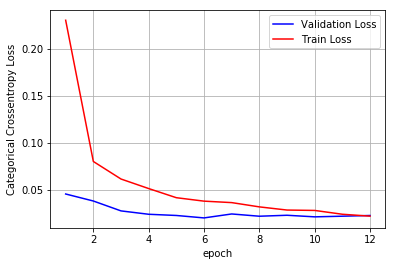

In [21]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 130us/step - loss: 0.2782 - acc: 0.9105 - val_loss: 0.0382 - val_acc: 0.9882
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0826 - acc: 0.9759 - val_loss: 0.0323 - val_acc: 0.9903
Epoch 3/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0616 - acc: 0.9823 - val_loss: 0.0233 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0492 - acc: 0.9856 - val_loss: 0.0237 - val_acc: 0.9920
Epoch 5/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0433 - acc: 0.9868 - val_loss: 0.0193 - val_acc: 0.9938
Epoch 6/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.0403 - acc: 0.9885 - val_loss: 0.0199 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0335 - acc: 0.9900 - val_loss: 0.0189 - val_ac

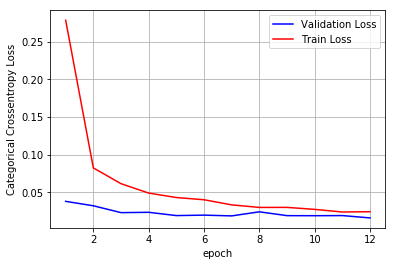

In [22]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(100, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.3038 - acc: 0.9070 - val_loss: 0.0574 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0896 - acc: 0.9741 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 3/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0630 - acc: 0.9810 - val_loss: 0.0288 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0515 - acc: 0.9848 - val_loss: 0.0261 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0424 - acc: 0.9876 - val_loss: 0.0239 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0229 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0216 - val_acc

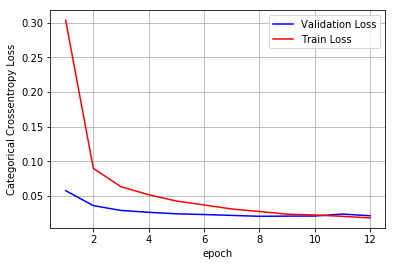

In [30]:
def model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
  graph = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
  x = list(range(1,epochs+1))
  vy = graph.history['val_loss']
  ty = graph.history['loss']
  plt_dynamic(x, vy, ty, ax)
model()

CONCLUSIONS:

1) Tried with various combinations of architectures and kernels sizes. Best accuracy was obtained with 3x3  kernel with accuracy of 0.994. There were other architectures with better accuracy but also had overfitting.
2) Learnt that there is no specific architecture for obtaining good accuracy. Trial and error has to be done. Since this was a small dataset, for large dataset the architecture might be different.
3) Dropout is needed to avoid overfitting.


In [32]:
!pip install -q PTable
from prettytable import PrettyTable 

x = PrettyTable()
x.field_names = [ "Architecture", "Kernel Size","Overfitting oberserved", "Test Accuracy"]
x.add_row(["conv->conv->m_pool->drop-..","3x3"," no ",0.9911])
x.add_row(["conv->conv->m_pool->drop-..","3x3"," yes ",0.9927])
x.add_row(["conv->conv->m_pool->drop->conv-..","3x3"," no ",0.9940])
x.add_row(["conv->conv->m_pool->drop->conv-..","3x3"," yes ",0.9951])
x.add_row(["conv->conv->m_pool->drop->conv->m_pool-..","3x3"," yes ",0.9917])
x.add_row(["conv->conv->m_pool->drop->conv->m_pool-..","3x3"," no ",0.991])
x.add_row(["conv->conv->m_pool->drop->conv-..","2x2"," no ",0.9913])
x.add_row(["conv->conv->m_pool->drop->conv->m_pool->conv-..","2x2"," no ",0.9931])
x.add_row(["conv->conv->m_pool->drop-..","5x5"," no ",0.9934])
x.add_row(["conv->conv->m_pool->drop->conv->m_pool->drop-..","5x5"," yes ",0.9949])
x.add_row(["conv->m_pool->conv->m_pool-..","5x5"," no ",0.9938])
print(x)

+-------------------------------------------------+-------------+------------------------+---------------+
|                   Architecture                  | Kernel Size | Overfitting oberserved | Test Accuracy |
+-------------------------------------------------+-------------+------------------------+---------------+
|           conv->conv->m_pool->drop-..           |     3x3     |           no           |     0.9911    |
|           conv->conv->m_pool->drop-..           |     3x3     |          yes           |     0.9927    |
|        conv->conv->m_pool->drop->conv-..        |     3x3     |           no           |     0.994     |
|        conv->conv->m_pool->drop->conv-..        |     3x3     |          yes           |     0.9951    |
|    conv->conv->m_pool->drop->conv->m_pool-..    |     3x3     |          yes           |     0.9917    |
|    conv->conv->m_pool->drop->conv->m_pool-..    |     3x3     |           no           |     0.991     |
|        conv->conv->m_pool->drop->co

1)Here after " .. " the complete layer is -> flat -> dense -> dropout -> dense.
2) Overfitting is observed as 'yes' but it is subjective compared to other models.